In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import epidemic_model_classes_numba as epi_mod
from scipy.integrate import odeint
import scipy.stats as st
from scipy.stats import pearsonr
import os
from tqdm import tqdm

In [43]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

country = "Brazil"
country_folder = "Brazil_past_sample_numbers"
country_file_name = "brazil"
window_size = 30

log_flat = []
log_flat_1e4 = []
log_flat_1e5 = []
log_past = []

for folder in os.listdir("/media/valeriano/21409cb2-cdec-4a1b-9bf0-34d1df048767/valeriano/Documents/LNCC-COVID-19-prediction/logs/sdumont"):
    if "fixed_Brazil_1000_samples_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "True" in folder:
        log_past.append("../logs/sdumont/"+folder+"/")
    if "adaptive_Brazil_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "False" in folder:
        log_flat.append("../logs/sdumont/"+folder+"/")
    elif "adaptive_Brazil_10000_samples_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "False" in folder:
        log_flat_1e4.append("../logs/sdumont/"+folder+"/")
    elif "adaptive_Brazil_100000_samples_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "False" in folder:
        log_flat_1e5.append("../logs/sdumont/"+folder+"/")

In [44]:
log_past

['../logs/sdumont/log2022-03-09_12-41-19_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-25-23_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_13-05-59_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-33-33_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-17-00_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_15-59-04_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_12-32-41_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-07-57_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_12-57-52_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/l

In [45]:
log_flat

['../logs/sdumont/log2021-10-04_00-18-31_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-10-04_00-13-33_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-10-04_00-16-05_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-08-24_22-20-44_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-08-24_22-28-04_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-10-04_00-20-54_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-08-24_22-30-20_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-08-24_22-25-32_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-08-24_22-23-07_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-10-04_00-23-29_adaptive_Brazil_SEIRD2_3_posts_30_day-window_past_False/']

In [46]:
log_flat_1e4

['../logs/sdumont/log2021-11-29_22-28-48_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_15-48-39_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_15-39-28_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_15-18-36_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-29_22-05-24_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_15-57-58_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-29_21-52-43_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_15-28-48_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-11-30_16-07-08_adaptive_Brazil_10000_samples_SEIRD2_3_posts_30

In [47]:
log_flat_1e5

['../logs/sdumont/log2021-12-02_14-17-36_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-01_15-10-51_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-01_10-27-03_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-02_05-06-08_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-02_19-01-52_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-01_00-51-50_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-02_00-33-47_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-02_09-37-25_adaptive_Brazil_100000_samples_SEIRD2_3_posts_30_day-window_past_False/',
 '../logs/sdumont/log2021-12-01_05-20-35_adaptive_Brazil_100000_samples_SEIRD2_3

In [48]:
if country_folder not in os.listdir("paper_daora"):
    os.mkdir(f"paper_daora/{country_folder}")
if str(window_size) not in os.listdir(f"paper_daora/{country_folder}"):
    os.mkdir(f"paper_daora/{country_folder}/{str(window_size)}")

In [49]:
n_post_flat = len(os.listdir(log_flat[0]))-1
n_post_past = len(os.listdir(log_past[0]))-1
days_folders = os.listdir(log_flat[0]+f"Posterior1/{country}/SEIRD2")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post_flat)
print(n_post_past)
print(n_window)
print(days_folders)

3
3
76
[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405]


In [50]:
seird = epi_mod.SEIRD2

In [51]:
x_dat_flat = np.empty((len(log_flat), n_window), dtype=object)
y_fit_flat = np.empty((len(log_flat), n_window), dtype=object)
y_pred_flat = np.zeros((len(log_flat), n_window, 10, 2))

x_dat_flat4 = np.empty((len(log_flat), n_window), dtype=object)
y_fit_flat4 = np.empty((len(log_flat), n_window), dtype=object)
y_pred_flat4 = np.zeros((len(log_flat), n_window, 10, 2))

x_dat_flat5 = np.empty((len(log_flat), n_window), dtype=object)
y_fit_flat5 = np.empty((len(log_flat), n_window), dtype=object)
y_pred_flat5 = np.zeros((len(log_flat), n_window, 10, 2))

x_dat_past = np.empty((len(log_past), n_window), dtype=object)
y_fit_past = np.empty((len(log_past), n_window), dtype=object)
y_pred_past = np.zeros((len(log_past), n_window, 10, 2))

flat_params = np.zeros((len(log_flat), n_window, 8))
rmsd_flat_fit = np.zeros((len(log_flat), n_window))
rmsd_flat_pred = np.zeros((len(log_flat), n_window))
rmsd_flat_list = np.zeros((len(log_flat), n_window, 10, 2))
flat_tolerances = np.zeros((len(log_flat), n_post_flat, n_window))

flat_params4 = np.zeros((len(log_flat_1e4), n_window, 8))
rmsd_flat_fit4 = np.zeros((len(log_flat_1e4), n_window))
rmsd_flat_pred4 = np.zeros((len(log_flat_1e4), n_window))
rmsd_flat_list4 = np.zeros((len(log_flat_1e4), n_window, 10, 2))
flat_tolerances4 = np.zeros((len(log_flat_1e4), n_post_flat, n_window))

flat_params5 = np.zeros((len(log_flat_1e4), n_window, 8))
rmsd_flat_fit5 = np.zeros((len(log_flat_1e4), n_window))
rmsd_flat_pred5 = np.zeros((len(log_flat_1e4), n_window))
rmsd_flat_list5 = np.zeros((len(log_flat_1e4), n_window, 10, 2))
flat_tolerances5 = np.zeros((len(log_flat_1e4), n_post_flat, n_window))

past_params = np.zeros((len(log_past), n_window, 8))
rmsd_past_fit = np.zeros((len(log_past), n_window))
rmsd_past_pred = np.zeros((len(log_past), n_window))
rmsd_past_list = np.zeros((len(log_past), n_window, 10, 2))
past_tolerances = np.zeros((len(log_past), n_post_past, n_window))

post_flat_size = np.zeros((len(log_flat), n_window), dtype=np.int64)
post_flat_size4 = np.zeros((len(log_flat_1e4), n_window), dtype=np.int64)
post_flat_size5 = np.zeros((len(log_flat_1e4), n_window), dtype=np.int64)
post_past_size = np.zeros((len(log_past), n_window), dtype=np.int64)

In [52]:
for log_idx in range(len(log_flat)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_flat[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_flat[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_flat[log_idx, window] = np.loadtxt(log_flat[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_flat[log_idx, window] = np.loadtxt(log_flat[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_flat[log_idx, window] = np.loadtxt(log_flat[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_flat[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_flat_list[log_idx, window] = np.loadtxt(log_flat[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        flat_params[log_idx, window] = np.loadtxt(log_flat[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_flat_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_flat_pred[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                    post_flat_size[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_flat):
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])

for log_idx in range(len(log_flat_1e4)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_flat_1e4[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_flat4[log_idx, window] = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_flat4[log_idx, window] = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_flat4[log_idx, window] = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_flat_1e4[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_flat_list4[log_idx, window] = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        flat_params4[log_idx, window] = np.loadtxt(log_flat_1e4[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_flat_fit4[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_flat_pred4[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                    post_flat_size4[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_flat):
            log = open(log_flat_1e4[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances4[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_flat_1e4[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances4[log_idx, post, window] = float(line.split(" ")[-1])

for log_idx in range(len(log_flat_1e5)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_flat_1e5[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_flat5[log_idx, window] = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_flat5[log_idx, window] = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_flat5[log_idx, window] = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_flat_1e5[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_flat_list5[log_idx, window] = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        flat_params5[log_idx, window] = np.loadtxt(log_flat_1e5[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_flat_fit5[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_flat_pred5[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                    post_flat_size5[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_flat):
            log = open(log_flat_1e5[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances5[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_flat_1e5[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances5[log_idx, post, window] = float(line.split(" ")[-1])
                    
for log_idx in range(len(log_past)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_past[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_past[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_past[log_idx, window] = np.loadtxt(log_past[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_past[log_idx, window] = np.loadtxt(log_past[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_past[log_idx, window] = np.loadtxt(log_past[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_past[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_past_list[log_idx, window] = np.loadtxt(log_past[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        past_params[log_idx, window] = np.loadtxt(log_past[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_past_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_past_pred[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                post_past_size[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_past):
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████████████████████████████████████| 76/76 [00:00<00:00, 487.83it/s]


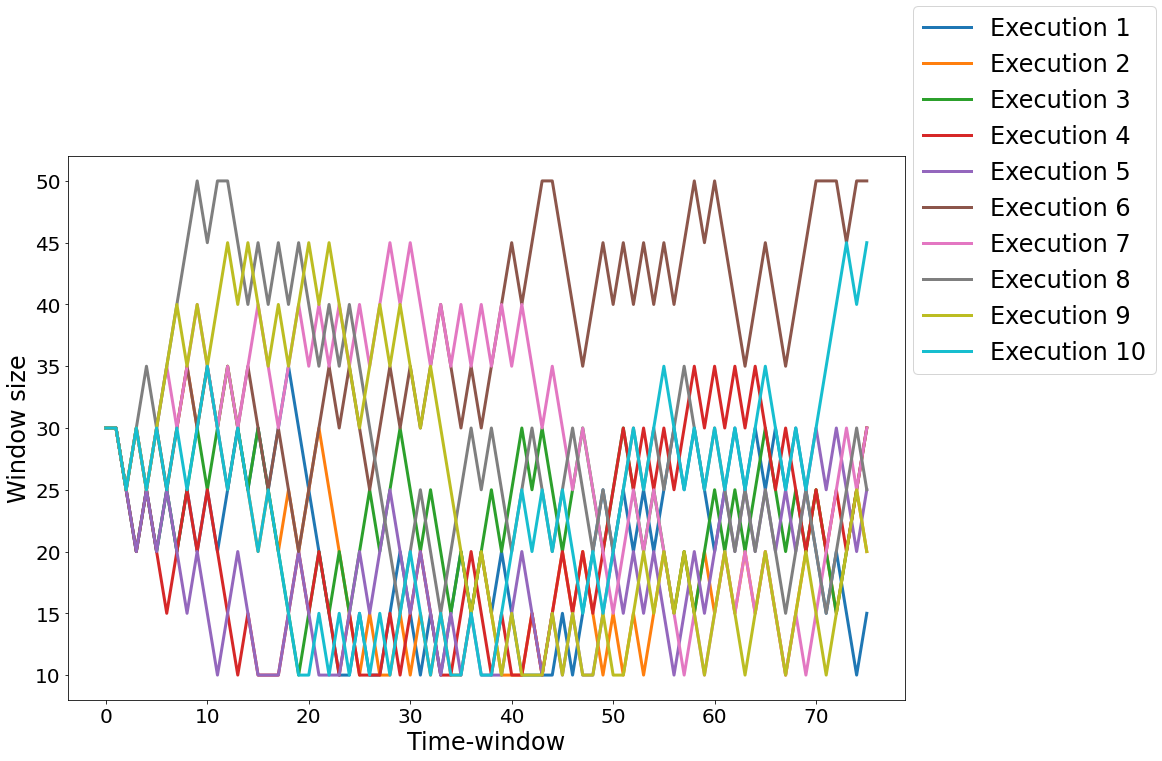

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(log_flat)):
    plt.plot(post_flat_size[i], lw=3, label=f"Execution {i+1}")
plt.legend(loc=(1.01, 0.6), fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time-window", fontsize=24)
plt.ylabel("Window size", fontsize=24)
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_window_size_flat.png", dpi=300, bbox_inches="tight")

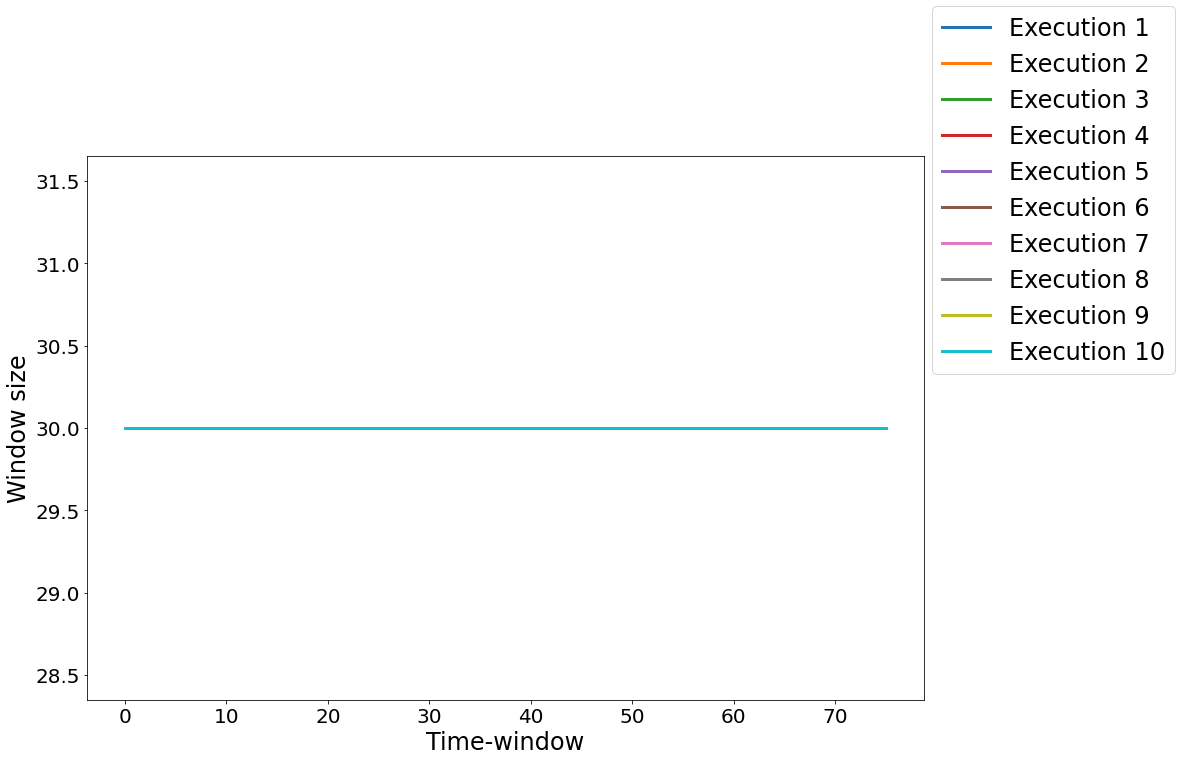

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(log_past)):
    plt.plot(post_past_size[i], lw=3, label=f"Execution {i+1}")
plt.legend(loc=(1.01, 0.6), fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time-window", fontsize=24)
plt.ylabel("Window size", fontsize=24)
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_window_size_past.png", dpi=300, bbox_inches="tight")

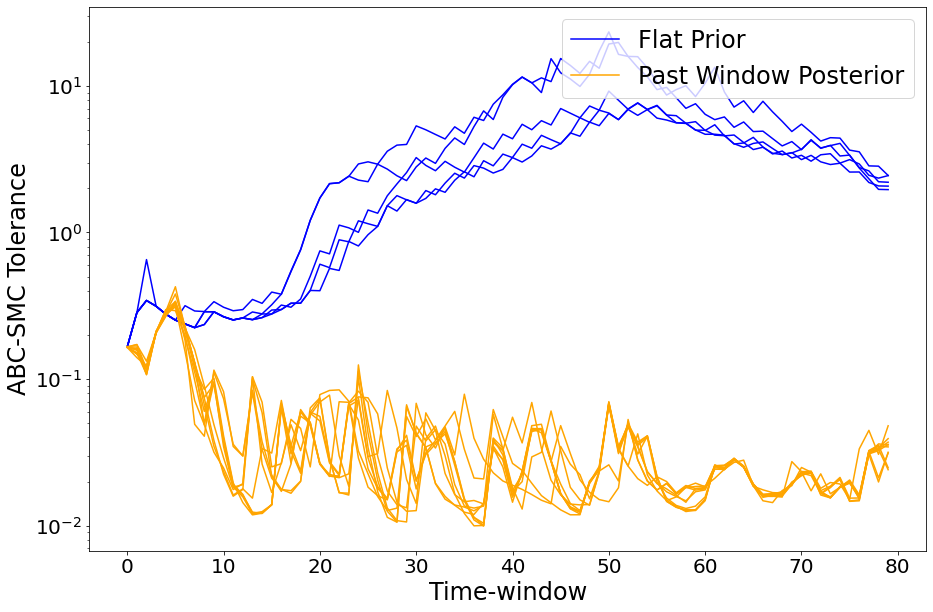

In [12]:
plt.figure(figsize=(15,10))
for i in range(len(log_flat)):
    if i == 1:
        plt.plot(flat_tolerances[i,-1,:].T, c="blue", label="Flat Prior")
    else:
        plt.plot(flat_tolerances[i,-1,:].T, c="blue")
for i in range(len(log_past)):
    if i == 1:
        plt.plot(past_tolerances[i,-1,:].T, c="orange", label="Past Window Posterior")
    else:
        plt.plot(past_tolerances[i,-1,:].T, c="orange")
plt.legend(loc="upper right", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time-window", fontsize=24)
plt.ylabel("ABC-SMC Tolerance", fontsize=24)
plt.yscale("log")
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_tolerances.png", dpi=300, bbox_inches="tight")

Flat 0.14528209736842104
Past 0.018373003947368422


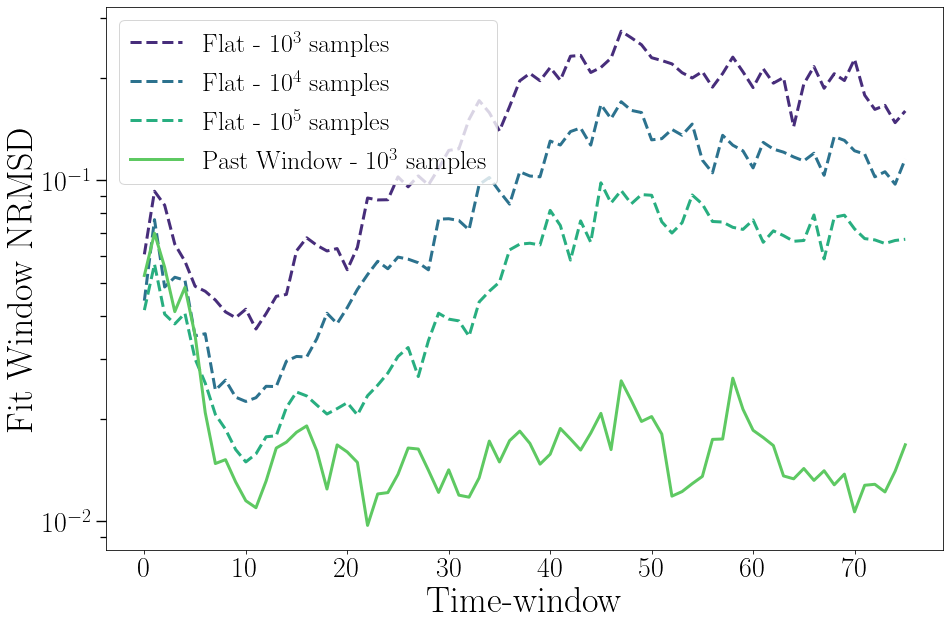

In [59]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(rmsd_flat_fit, axis=0), lw=3, color=sb.color_palette("viridis", 7)[0], ls="--", label="Flat - $10^{3}$ samples")
plt.plot(np.mean(rmsd_flat_fit4, axis=0), lw=3, color=sb.color_palette("viridis", 7)[2], ls="--", label="Flat - $10^{4}$ samples")
plt.plot(np.mean(rmsd_flat_fit5, axis=0), lw=3, color=sb.color_palette("viridis", 7)[4], ls="--", label="Flat - $10^{5}$ samples")
# plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_flat_fit, axis=0), np.max(rmsd_flat_fit, axis=0), alpha=0.6, color=sb.color_palette("viridis", 5)[0])
plt.plot(np.mean(rmsd_past_fit, axis=0), lw=3, color=sb.color_palette("viridis", 7)[5], label="Past Window - $10^{3}$ samples")
# plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_past_fit, axis=0), np.max(rmsd_past_fit, axis=0), alpha=0.6, color=sb.color_palette("viridis", 5)[3])
plt.legend(loc="upper left", fontsize=26)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.gca().yaxis.set_tick_params(width=1.4, length=10, which="major")
plt.gca().yaxis.set_tick_params(width=1.3, length=6, which="minor")
plt.xlabel("Time-window", fontsize=36)
plt.ylabel("Fit Window NRMSD", fontsize=36)
plt.yscale("log")
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_fit_window_nrmsd_flat_vs_past.png", dpi=300, bbox_inches="tight")
print("Flat", np.mean(rmsd_flat_fit))
print("Past", np.mean(rmsd_past_fit))

Flat 1.0157154197368423
Past 0.23454288684210525


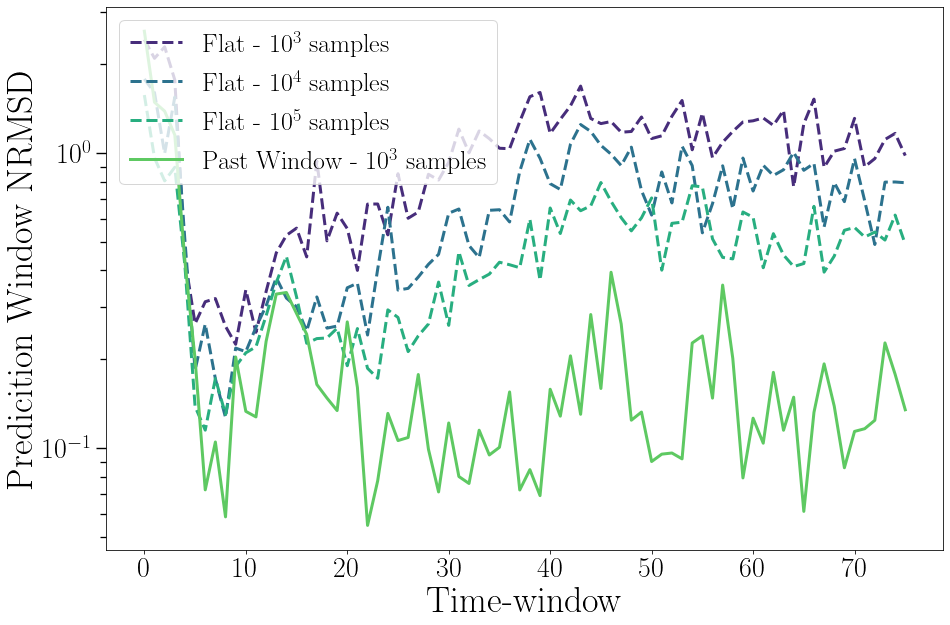

In [58]:
plt.figure(figsize=(15, 10))
plt.plot(np.mean(rmsd_flat_pred, axis=0), lw=3, color=sb.color_palette("viridis", 7)[0], ls="--", label="Flat - $10^{3}$ samples")
plt.plot(np.mean(rmsd_flat_pred4, axis=0), lw=3, color=sb.color_palette("viridis", 7)[2], ls="--", label="Flat - $10^{4}$ samples")
plt.plot(np.mean(rmsd_flat_pred5, axis=0), lw=3, color=sb.color_palette("viridis", 7)[4], ls="--", label="Flat - $10^{5}$ samples")
# plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_flat_pred, axis=0), np.max(rmsd_flat_pred, axis=0), alpha=0.8, color="#cac5f8")
plt.plot(np.mean(rmsd_past_pred, axis=0), lw=3, color=sb.color_palette("viridis", 7)[5], label="Past Window - $10^{3}$ samples")
# plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_past_pred, axis=0), np.max(rmsd_past_pred, axis=0), alpha=0.5, color="#ff9f1d")
plt.legend(loc="upper left", fontsize=26)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.gca().yaxis.set_tick_params(width=1.4, length=10, which="major")
plt.gca().yaxis.set_tick_params(width=1.3, length=6, which="minor")
plt.xlabel("Time-window", fontsize=36)
plt.ylabel("Predicition Window NRMSD", fontsize=36)
plt.yscale("log")
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_pred_window_nrmsd_flat_vs_past.png", dpi=300, bbox_inches="tight")
print("Flat", np.mean(rmsd_flat_pred))
print("Past", np.mean(rmsd_past_pred))

In [15]:
rmsd_flat_list_norm = np.abs((y_pred_flat[:,:,1:]-rmsd_flat_list[:,:,1:])-(y_pred_flat[:,:,:-1]-rmsd_flat_list[:,:,:-1])-(y_pred_flat[:,:,1:]-y_pred_flat[:,:,:-1]))/(y_pred_flat[:,:,1:]-y_pred_flat[:,:,:-1]+1)
rmsd_past_list_norm = np.abs((y_pred_past[:,:,1:]-rmsd_past_list[:,:,1:])-(y_pred_past[:,:,:-1]-rmsd_past_list[:,:,:-1])-(y_pred_past[:,:,1:]-y_pred_past[:,:,:-1]))/(y_pred_past[:,:,1:]-y_pred_past[:,:,:-1]+1)

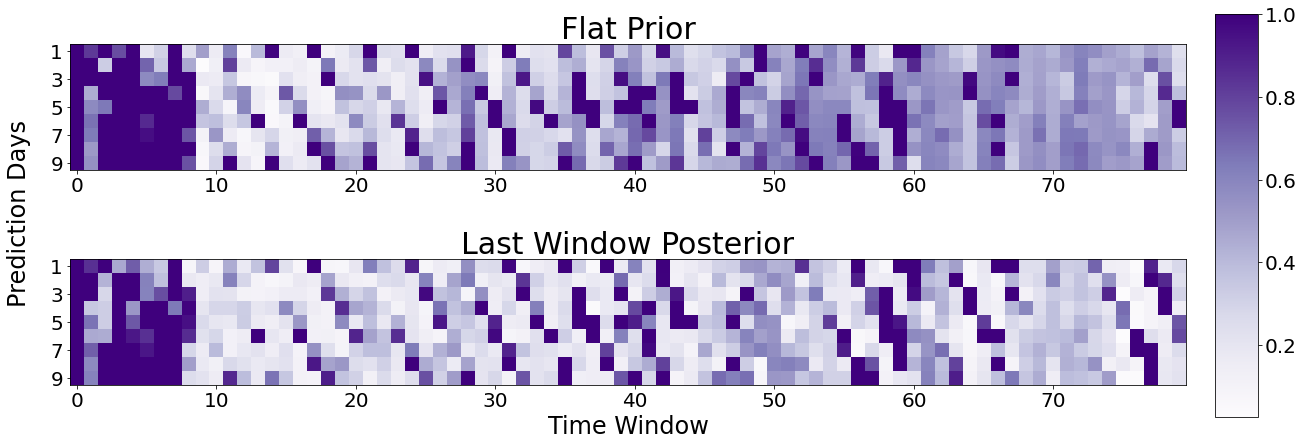

In [16]:
# plt.rcParams.update({"font.size":36})
fig = plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,1,1)
pl = plt.imshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples")
plt.yticks(range(0,10,2), labels=range(1,11,2), fontsize=20)
plt.xticks(fontsize=20)
plt.title("Flat Prior", fontsize=30)
plt.subplot(2,1,2)
plt.imshow(np.mean(rmsd_past_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples")
plt.yticks(range(0,10,2), labels=range(1,11,2), fontsize=20)
plt.xticks(fontsize=20)
plt.title("Last Window Posterior", fontsize=30)
plt.xlabel("Time Window", fontsize=24)
plt.text(-5, 2.5, "Prediction Days", rotation="vertical", fontsize=24)
cb_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
cb = fig.colorbar(pl, cax=cb_ax)
cb.ax.tick_params(labelsize=20)
plt.savefig(f"paper_daora/{country_folder}/{window_size}/{country_file_name}_{window_size}_heatmap.png", dpi=300, bbox_inches="tight")

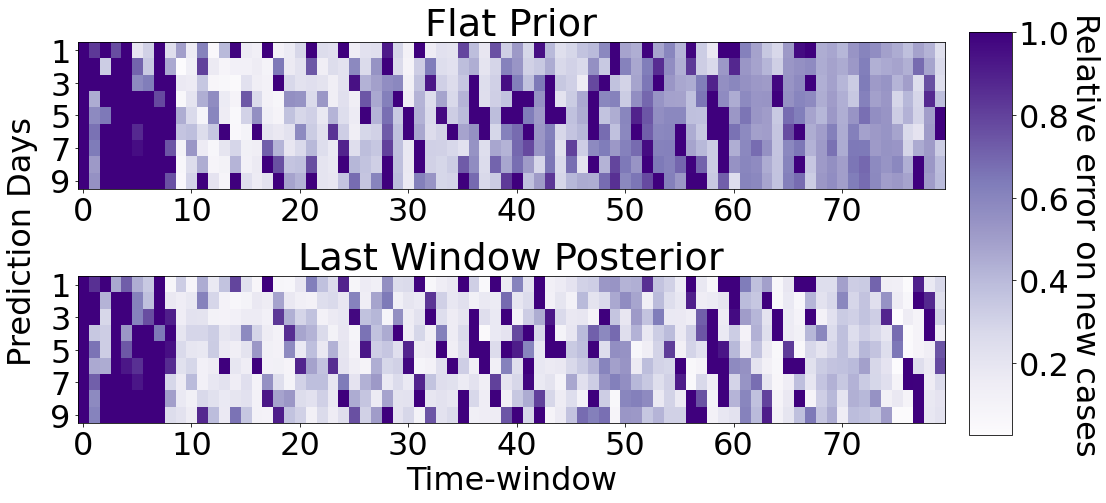

In [17]:
plt.rcParams.update({"font.size":32})
fig = plt.figure(figsize=(20,7))
# fig, ax = plt.subplots(2,1,sharey=True)
plt.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
pl = plt.imshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples", aspect=1.5)
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Flat Prior")
plt.subplot(2,1,2)
plt.imshow(np.mean(rmsd_past_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples", aspect=1.5)
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Last Window Posterior")
plt.xlabel("Time-window")
plt.text(-7, 4.5, "Prediction Days", rotation="vertical")
cb_ax = fig.add_axes([0.83, 0.1, 0.03, 0.8])

cbar = fig.colorbar(pl, cax=cb_ax)
cbar.set_label("Relative error on new cases", rotation=-90, labelpad=30)
# plt.tight_layout()
# plt.savefig("flat_vs_past_heatmap.pdf", bbox_inches="tight")

In [18]:
pearsonr(rmsd_flat_fit.flatten(), rmsd_flat_pred.flatten())

(-0.00462249891764497, 0.9265700058628434)

In [19]:
pearsonr(rmsd_past_fit.flatten(), rmsd_past_pred.flatten())

(0.20298877839741847, 6.921240819923998e-09)

---

# R0

def R0(beta, beta_E, mu, gamma, tau):
    return ((gamma+mu)*beta_E + beta/tau)/((gamma + mu)/tau)

df = pd.read_csv('../data/owid-covid-data.csv')

uk = df.loc[df['location'] == country]
uk['date'] = pd.to_datetime(uk['date'], format = '%Y-%m-%d')

daily = np.array(uk['new_cases_smoothed'].values)
rt = np.array(uk['reproduction_rate'].values)

daily = np.nan_to_num(daily)
rt = np.nan_to_num(rt)

def R0(beta, beta_E, mu, gamma, tau):
    return beta_E*tau + beta/(gamma+mu)

data_path = log_flat[0]+f"Posterior3/{country}/SEIRD2"

window_sizes = post_flat_size[0]

days = np.arange(1, days_folders[-1])
r0 = np.zeros(len(days))

for i in tqdm(range(len(days))):
    count_overlap = 0
    for window_idx in range(np.searchsorted(days_folders, days[i]), min(len(days_folders), np.searchsorted(days_folders, days[i])+10)):
        if days[i] >= days_folders[window_idx] - window_sizes[window_idx]:
            post = np.loadtxt(f'{data_path}/{days_folders[window_idx]}_days/post.txt')
            post = post[np.argsort(post[:,-1])]
            r = 0
            for j in range(1):
                beta = post[j,0]
                beta_E = post[j,1]
                mu = post[j,3]
                gamma = post[j,4]
                tau = post[j,5]
                r += R0(beta, beta_E, mu, gamma, tau)
            r0[i] += r/1
            count_overlap += 1
    r0[i] /= count_overlap

plt.plot(r0)

data_path = log_past[0]+f"Posterior3/{country}/SEIRD2"

window_sizes = post_past_size[0]

days = np.arange(1, days_folders[-1])
r0 = np.zeros(len(days))

for i in tqdm(range(len(days))):
    count_overlap = 0
    for window_idx in range(np.searchsorted(days_folders, days[i]), min(len(days_folders), np.searchsorted(days_folders, days[i])+10)):
        if days[i] >= days_folders[window_idx] - window_sizes[window_idx]:
            post = np.loadtxt(f'{data_path}/{days_folders[window_idx]}_days/post.txt')
            post = post[np.argsort(post[:,-1])]
            r = 0
            for j in range(15):
                beta = post[j,0]
                beta_E = post[j,1]
                mu = post[j,3]
                gamma = post[j,4]
                tau = post[j,5]
                r += R0(beta, beta_E, mu, gamma, tau)
            r0[i] += r/15
            count_overlap += 1
    r0[i] /= count_overlap

plt.plot(r0)
plt.hlines(1, 0, 430)

---

# Subplots - Flat

In [18]:
plt.subplots(int(np.ceil(n_window/8)), 8, figsize=(40, 50))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

y0 = np.zeros(5)

for i in range(n_window, int(np.ceil(n_window/8))*8):
    plt.subplot(int(np.ceil(n_window/8)), 8, i+1)
    plt.axis("off")

for i in tqdm(range(n_window)):
    y_fit = np.zeros((len(log_flat), 60))
    x_len = 0
    x_max_len_idx = -1
    
    for log_idx in range(len(log_flat)):
        if len(x_dat_flat[log_idx, i]) > x_len:
            x_len = len(x_dat_flat[log_idx, i])
            x_max_length_idx = log_idx
        
        y0[-1] = y_fit_flat[log_idx, i][0,1]
        y0[-2] = y_fit_flat[log_idx, i][0,0] - y0[-1]
        
        y_fit[log_idx,-len(x_dat_flat[log_idx, i]):] = seird.infected_dead(x_dat_flat[log_idx, i], flat_params[log_idx, i], y0)[0]
    
    y_fit_avg = np.zeros(x_len)
    y_fit_std = np.zeros(x_len)
    
    for j in range(x_len):
        y = []
        for k in range(len(log_flat)):
            if y_fit[k,j-x_len] != 0:
                y.append(y_fit[k,j-x_len])
        y_fit_avg[j] = np.mean(y)
        y_fit_std[j] = np.std(y)

    plt.subplot(int(np.ceil(n_window/8)), 8, i+1)
    plt.plot(x_dat_flat[x_max_length_idx, i][:-10], y_fit_flat[x_max_length_idx, i][:,0], "o", ms=3, c="k")
    plt.plot(x_dat_flat[x_max_length_idx, i][-10:], y_pred_flat[x_max_length_idx, i,:,0], "o", ms=3, c="#808080")
    plt.ticklabel_format(axis="y", scilimits=(0,1))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().yaxis.get_offset_text().set_fontsize(10)
    
    plt.title(f"Time-window {x_dat_flat[x_max_length_idx, i][0]:.0f}-{x_dat_flat[x_max_length_idx, i][-1]:.0f}", fontsize=18)
    
    plt.plot(x_dat_flat[x_max_length_idx, i], y_fit_avg, lw=2)
    plt.fill_between(x_dat_flat[x_max_length_idx, i], y_fit_avg-y_fit_std, y_fit_avg+y_fit_std, alpha=0.3)
    
    plt.vlines(np.mean(x_dat_flat[x_max_length_idx, i][-11:-9]), y_fit_flat[x_max_length_idx, i][0,0], max(y_pred_flat[x_max_length_idx, i,-1,0], y_fit_avg[-1]+y_fit_std[-1]), color="#202020", ls="--", lw=1)
    
plt.savefig(f"paper_daora/{country}/{window_size}/{country_file_name}_{window_size}_windows_flat.png", dpi=300, bbox_inches="tight")
plt.close()

100%|██████████| 83/83 [00:10<00:00,  7.98it/s]


In [19]:
plt.subplots(int(np.ceil(n_window/8)), 8, figsize=(40, 50))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

y0 = np.zeros(5)

for i in range(n_window, int(np.ceil(n_window/8))*8):
    plt.subplot(int(np.ceil(n_window/8)), 8, i+1)
    plt.axis("off")

for i in tqdm(range(n_window)):
    y_fit = np.zeros((len(log_past), 60))
    x_len = 0
    x_max_len_idx = -1
    
    for log_idx in range(len(log_past)):
        if len(x_dat_past[log_idx, i]) > x_len:
            x_len = len(x_dat_past[log_idx, i])
            x_max_length_idx = log_idx
        
        y0[-1] = y_fit_past[log_idx, i][0,1]
        y0[-2] = y_fit_past[log_idx, i][0,0] - y0[-1]
        
        y_fit[log_idx,-len(x_dat_past[log_idx, i]):] = seird.infected_dead(x_dat_past[log_idx, i], past_params[log_idx, i], y0)[0]
    
    y_fit_avg = np.zeros(x_len)
    y_fit_std = np.zeros(x_len)
    
    for j in range(x_len):
        y = []
        for k in range(len(log_past)):
            if y_fit[k,j-x_len] != 0:
                y.append(y_fit[k,j-x_len])
        y_fit_avg[j] = np.mean(y)
        y_fit_std[j] = np.std(y)

    plt.subplot(int(np.ceil(n_window/8)), 8, i+1)
    plt.plot(x_dat_past[x_max_length_idx, i][:-10], y_fit_past[x_max_length_idx, i][:,0], "o", ms=3, c="k")
    plt.plot(x_dat_past[x_max_length_idx, i][-10:], y_pred_past[x_max_length_idx, i, :,0], "o", ms=3, c="#808080")
    plt.ticklabel_format(axis="y", scilimits=(0,1))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().yaxis.get_offset_text().set_fontsize(10)
    
    plt.title(f"Time-window {x_dat_past[x_max_length_idx, i][0]:.0f}-{x_dat_past[x_max_length_idx, i][-1]:.0f}", fontsize=18)
    
    plt.plot(x_dat_past[x_max_length_idx, i], y_fit_avg, lw=2)
    plt.fill_between(x_dat_past[x_max_length_idx, i], y_fit_avg-y_fit_std, y_fit_avg+y_fit_std, alpha=0.3)
    
    plt.vlines(np.mean(x_dat_past[x_max_length_idx, i][-11:-9]), y_fit_past[x_max_length_idx, i][0,0], max(y_pred_past[x_max_length_idx, i,-1,0], y_fit_avg[-1]+y_fit_std[-1]), color="#202020", ls="--", lw=1)

plt.savefig(f"paper_daora/{country}/{window_size}/{country_file_name}_{window_size}_windows_past.png", dpi=300, bbox_inches="tight")
plt.close()

100%|██████████| 83/83 [00:03<00:00, 22.83it/s]
